# diabetes

In [2]:
from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
X = dataset[:,0:8]
y = dataset[:,8]

In [9]:
X.shape

(768, 8)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


2021-09-18 20:28:46.558260: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)

2021-09-18 20:34:18.473408: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 10.5945 - accuracy: 0.6562
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.4772 - accuracy: 0.6302
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 1.1683 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 1.0672 - accuracy: 0.6471
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9837 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9103 - accuracy: 0.6706
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8292 - accuracy: 0.6654
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7764 - accuracy: 0.6810
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7566 - accuracy: 0.6771
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.7148
Epoch 11

77/77 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.7422
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7500
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7422
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.7448
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7305
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7383
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7448
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7396
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7526
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7435
Epoch 93/150


In [10]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 712us/step - loss: 0.4979 - accuracy: 0.7656
Accuracy: 76.56


In [12]:
predictions = model.predict(X)

rounded = [round(x[0]) for x in predictions]

In [13]:
predictions = model.predict_classes(X)

for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [17]:
model?

# fuel

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [19]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [20]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [22]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [23]:
dataset = dataset.dropna()

In [24]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [25]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [26]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [27]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [28]:
model = tf.keras.models.Sequential([
      normalizer,
      layers.Dense(64,  activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [29]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [30]:
model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 23.0390
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 22.2189
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 21.2724
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 20.0089
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 18.2789
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 15.9585
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 13.3817
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 10.6904
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 7.4349
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 5.1960
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 4.4201
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 3.6835
Epoch 13/100
10/10 [=========

In [31]:
test_results = model.evaluate(test_features, test_labels, verbose=0)
test_results

1.7271851301193237

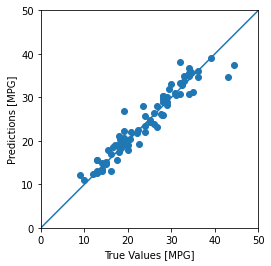

In [32]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Bankrupt

In [33]:
from numpy import loadtxt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [34]:
dataset = loadtxt('bankruptTrain.csv', delimiter=',')

train_x = dataset[:,0:4]
train_y = dataset[:,4]
print(train_x.shape)
print(train_y.shape)

(46, 4)
(46,)


In [35]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_x))
print(normalizer.mean.numpy())

[[ 0.096 -0.007  2.033  0.432]]


In [36]:
model = tf.keras.models.Sequential([
  normalizer,
  tf.keras.layers.Dense(24,  activation='relu'),
  tf.keras.layers.Dense(24, activation='relu'),
  layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 4)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 754
Trainable params: 745
Non-trainable params: 9
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=150, batch_size=10)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7389 - accuracy: 0.3696
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5652
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6087
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6304
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6739
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7174
Epoch 7/150
5/5 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7391
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.8043
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.8043
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8696
Epoch 11/150
5/5 [===========

In [38]:
_, accuracy = model.evaluate(train_x, train_y, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9348
Accuracy: 93.48


In [39]:
dataset_test = loadtxt('bankruptTest.csv', delimiter=',')

test_x = dataset_test[:,0:4]
test_y = dataset_test[:,4]
print(test_x.shape)
print(test_y.shape)

(32, 4)
(32,)


In [40]:
test_results = model.evaluate(test_x, test_y, verbose=1)
test_results

1/1 [==============================] - 0s 105ms/step - loss: 0.1474 - accuracy: 0.9375


[0.14741423726081848, 0.9375]